In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('D:\epsilon course\datasets\horror_movies.csv')
df.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 32540 non-null  int64  
 1   original_title     32540 non-null  object 
 2   title              32540 non-null  object 
 3   original_language  32540 non-null  object 
 4   overview           31254 non-null  object 
 5   tagline            12706 non-null  object 
 6   release_date       32540 non-null  object 
 7   poster_path        28066 non-null  object 
 8   popularity         32540 non-null  float64
 9   vote_count         32540 non-null  int64  
 10  vote_average       32540 non-null  float64
 11  budget             32540 non-null  int64  
 12  revenue            32540 non-null  int64  
 13  runtime            32540 non-null  int64  
 14  status             32540 non-null  object 
 15  adult              32540 non-null  bool   
 16  backdrop_path      135

In [4]:
round(df.describe())

,id,popularity,vote_count,vote_average,budget,revenue,runtime,collection
count,32540.0,32540.0,32540.0,32540.0,32540.0,32540.0,32540.0,2306.0
mean,445911.0,4.0,63.0,3.0,543127.0,1349747.0,62.0,481535.0
std,305745.0,38.0,421.0,3.0,4542668.0,14430479.0,41.0,324498.0
min,17.0,0.0,0.0,0.0,0.0,0.0,0.0,656.0
25%,146495.0,1.0,0.0,0.0,0.0,0.0,14.0,155421.0
50%,426521.0,1.0,2.0,4.0,0.0,0.0,80.0,471259.0
75%,707534.0,2.0,11.0,6.0,0.0,0.0,91.0,759067.0
max,1033095.0,5089.0,16900.0,10.0,200000000.0,701842551.0,683.0,1033032.0


In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ','_')
df

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32535,1032201,Catch a Butcher,Catch a Butcher,en,In a maternity ward in nineteenth-century Indi...,NaN,2021-11-20,/4LHrYpe6bjiT8Wvkzl3269LIUZl.jpg,0.600,0,0.0,0,0,11,Released,False,NaN,Horror,NaN,NaN
32536,1032667,Shaye Saint John: The Triggers Compilation,Shaye Saint John: The Triggers Compilation,en,A bizarre mix of early Tod Hayne's and Phyllis...,"""Just keep in mind, that you'll be trying to s...",2006-10-30,/j1vWwxnTsoKjZFwJODiNHNS8GFK.jpg,0.600,0,0.0,0,0,92,Released,False,NaN,"Fantasy, Horror",NaN,NaN
32537,1032890,Welcome to the Occult Forest,Welcome to the Occult Forest,en,A washed up horror film director named Kôji Ku...,"Murders, crimes, laughter, psychics, superhero...",2022-07-22,/ngFyxdliPZrG3Qra7tW3LbWksFd.jpg,0.600,0,0.0,0,0,141,Released,False,/s8Kpai084gCgQlsT3bpaEYuJmDc.jpg,"Comedy, Drama, Horror",NaN,NaN
32538,1033052,The Mean One,The Mean One,en,"The Mean One is a hairy, green-skinned grump i...",NaN,2022-12-15,NaN,0.000,0,0.0,0,0,0,Post Production,False,NaN,Horror,NaN,NaN


## check missing values

In [6]:
df.isna().sum()

id                       0
original_title           0
title                    0
original_language        0
overview              1286
tagline              19834
release_date             0
poster_path           4474
popularity               0
vote_count               0
vote_average             0
budget                   0
revenue                  0
runtime                  0
status                   0
adult                    0
backdrop_path        18995
genre_names              0
collection           30234
collection_name      30234
dtype: int64

## check duplicated values

In [7]:
df.duplicated().sum()

0

## convert released date to datetime format

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 32540 non-null  int64         
 1   original_title     32540 non-null  object        
 2   title              32540 non-null  object        
 3   original_language  32540 non-null  object        
 4   overview           31254 non-null  object        
 5   tagline            12706 non-null  object        
 6   release_date       32540 non-null  datetime64[ns]
 7   poster_path        28066 non-null  object        
 8   popularity         32540 non-null  float64       
 9   vote_count         32540 non-null  int64         
 10  vote_average       32540 non-null  float64       
 11  budget             32540 non-null  int64         
 12  revenue            32540 non-null  int64         
 13  runtime            32540 non-null  int64         
 14  status

## univariate analysis

In [10]:
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns

Index(['id', 'popularity', 'vote_count', 'vote_average', 'budget', 'revenue',
       'runtime', 'collection'],
      dtype='object')

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


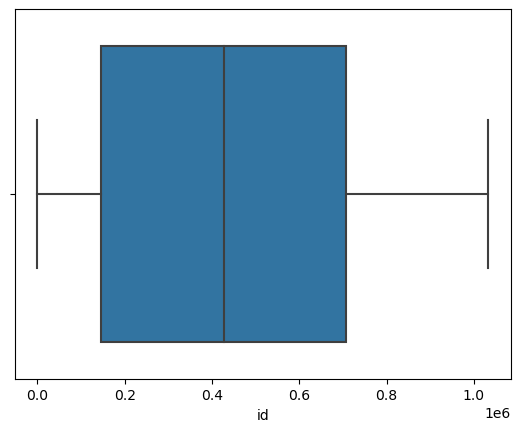

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


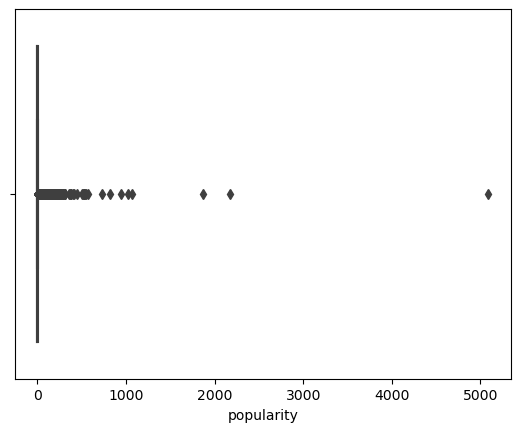

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


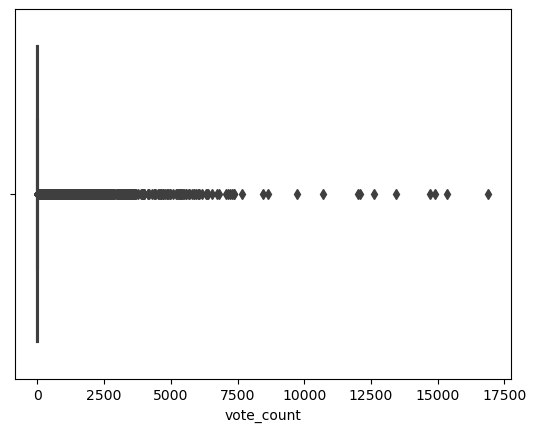

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


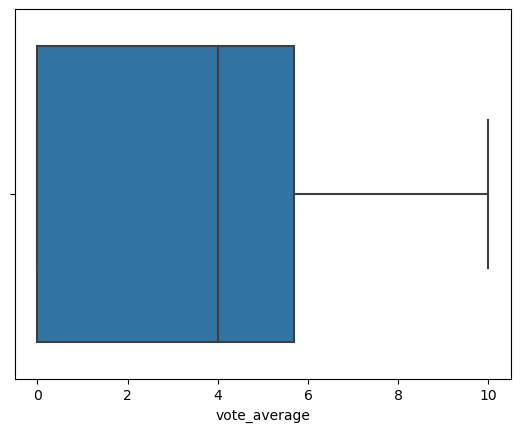

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


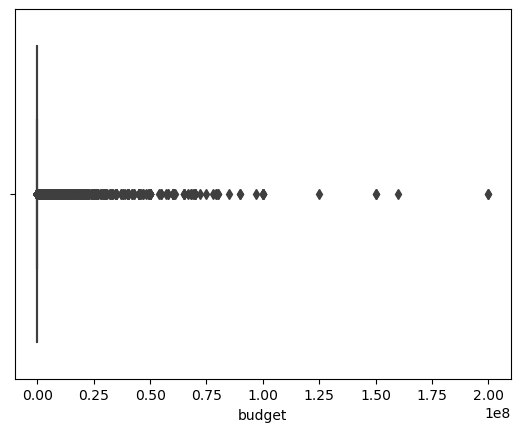

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


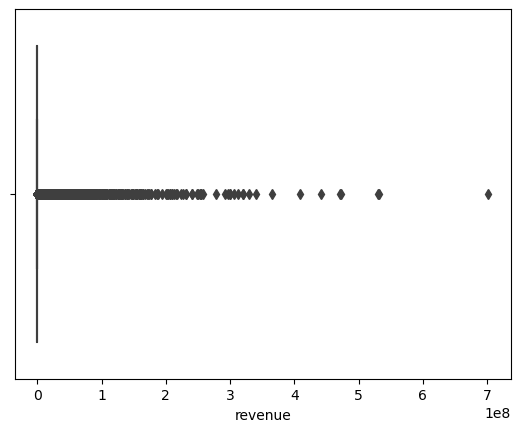

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


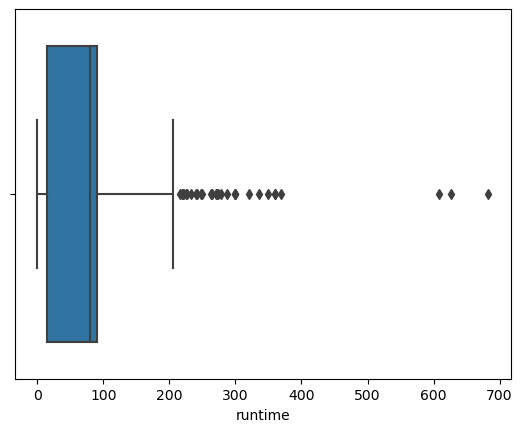

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


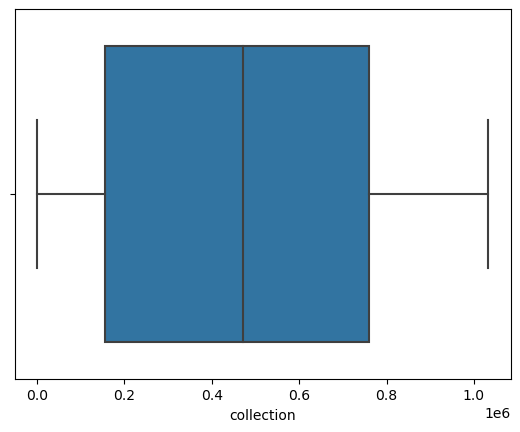

In [11]:
for col in numeric_columns:
    sns.boxplot(data = df, x=col)
    plt.show()

<Axes: >

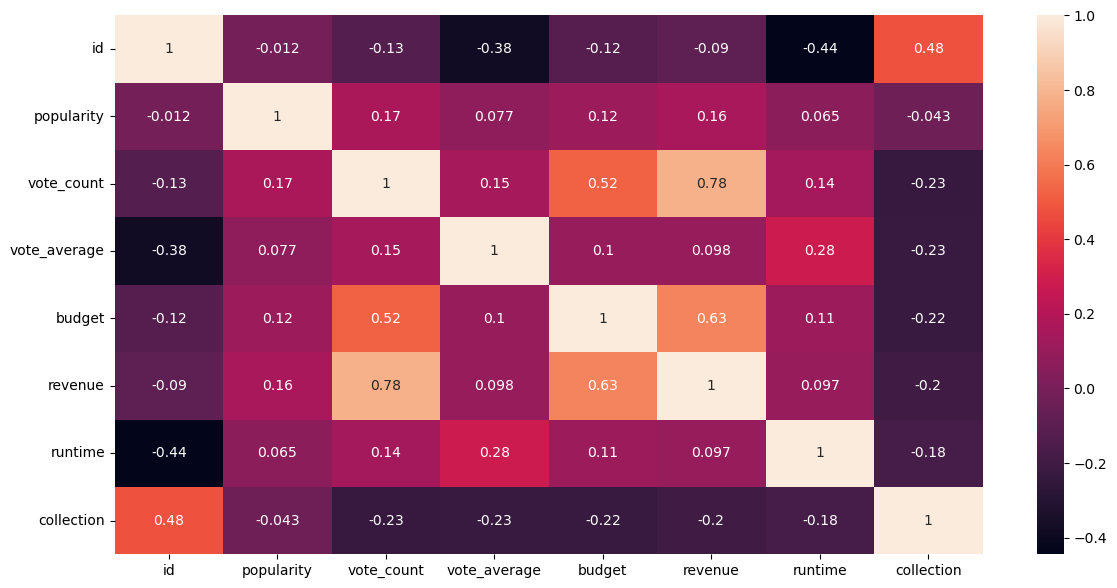

In [12]:
df_num = df.select_dtypes(include='number')
plt.figure(figsize =[14,7])
sns.heatmap(df_num.corr(),annot=True)


## bivariate analysis

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='release_date', ylabel='revenue'>

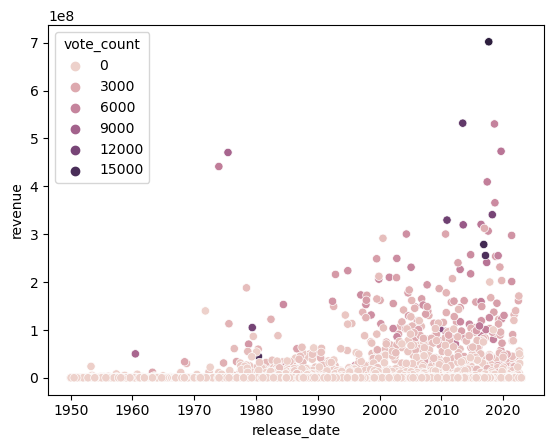

In [13]:
sns.scatterplot(data = df, x='release_date',y='revenue',hue='vote_count')

## creating new features

In [14]:
df['month'] = df['release_date'].dt.month
df['day'] = df['release_date'].dt.day
df['year'] = df['release_date'].dt.year

## Analysis Questions

## what is the average popularity rating of horror movies in the dataset?

In [15]:
df['popularity'].mean()

4.013455593116165

## Which horror movie has the highest revenue?



In [16]:
df['revenue'].max()

701842551

## What is the distribution of runtime for horror movies?

In [17]:
df['runtime'].describe()

count    32540.000000
mean        62.142901
std         40.998527
min          0.000000
25%         14.000000
50%         80.000000
75%         91.000000
max        683.000000
Name: runtime, dtype: float64

## How many horror movies in the dataset are part of a collection?

In [18]:
df['collection'].count()

2306

## Which horror movies has the highest vote average?

In [19]:
df['vote_average'].max()

10.0

## 	What is the most common original language among horror movies?

In [20]:
df['original_language'].mode()[0]

'en'

## Is there a correlation between movie popularity and vote count?

In [21]:
df['popularity'].corr(df['vote_count'])

0.16935468597740086

## what is the minimum revenue?

In [22]:
df['revenue'].min()

0

## what is the highest 10 movies revenue?

In [23]:
df.groupby('title')['revenue'].max().sort_values(ascending=False).head(10)

title
It                701842551
World War Z       531865000
The Meg           530243742
It Chapter Two    473122525
Jaws              470653000
The Exorcist      441306145
The Mummy         409231607
The Nun           365550119
A Quiet Place     340677200
Black Swan        329398046
Name: revenue, dtype: int64

## How many movies are released in each year?

In [24]:
df['year'].value_counts().sort_index()

year
1950       8
1951      15
1952      11
1953      22
1954      27
        ... 
2018    1771
2019    1895
2020    2100
2021    1992
2022    1534
Name: count, Length: 73, dtype: int64

## How many movies are part of a collection?

In [25]:
df['collection_name'].count()

2306

## what is the total revenue of the movies?

In [26]:
df['revenue'].sum()

43920758650

## how many movies are classified as horror?

In [27]:
len(df[df['genre_names'].str.contains('horror',case=False)])

32536

## what is the tagline of the movies with the highest 10 popularity?

In [28]:
df.groupby('tagline')['popularity'].max().sort_values(ascending=False).head(10)

tagline
There's always been something wrong with Esther.    5088.584
Fight for family.                                   2172.338
Once you see it, it’s too late.                     1863.628
Never talk to strangers.                            1071.398
Evil Rides Again                                     821.605
What’s a bad miracle?                                733.112
"If I die, you die"                                  574.832
Dying to show you a good time.                       543.670
God and the Devil cannot exist in the same body.     537.252
Once you open the box... you can't escape it.        527.579
Name: popularity, dtype: float64

## How many movies were released in each month?

In [29]:
df['month'].value_counts().sort_index()

month
1     5582
2     1670
3     2132
4     2189
5     2201
6     2211
7     2198
8     2472
9     2574
10    4852
11    2382
12    2077
Name: count, dtype: int64

## How many movies have a budget greater than $50 million?

In [30]:
len(df[df['budget']> 100000])

2328

## What is the earliest release date among the movies?

In [31]:
df['year'].min()

1950

## How many movies have a runtime greater than 100 minutes?

In [32]:
len(df['runtime'] >= 100)

32540

## How many movies are part of the Orphan Collection?

In [33]:
orphan_collection = df[df['collection_name'] == 'Orphan Collection']
len(orphan_collection)

2

## How many movies were released in each day of the week?

In [34]:
df['day'].value_counts().sort_index()

day
1     6191
2      843
3      824
4      837
5      876
6      855
7      833
8      791
9      801
10     977
11     916
12     958
13     949
14     874
15    1060
16     745
17     808
18     862
19     784
20     914
21     907
22     836
23     783
24     846
25    1042
26     824
27     871
28     986
29     757
30     923
31    1067
Name: count, dtype: int64

In [35]:
df.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,...,runtime,status,adult,backdrop_path,genre_names,collection,collection_name,month,day,year
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,...,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection,7,27,2022
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,...,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN,8,11,2022
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,...,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN,9,23,2022
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,...,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN,6,22,2022
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,...,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN,9,7,2022


## data visualization

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


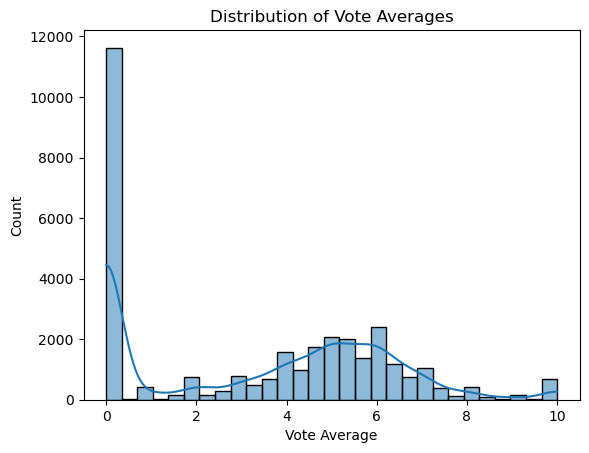

In [41]:
sns.histplot(data=df, x='vote_average', kde=True)
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.show()

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


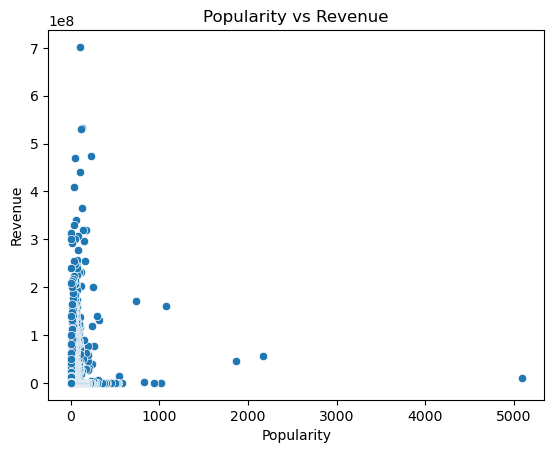

In [43]:
sns.scatterplot(data=df, x='popularity', y='revenue')
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


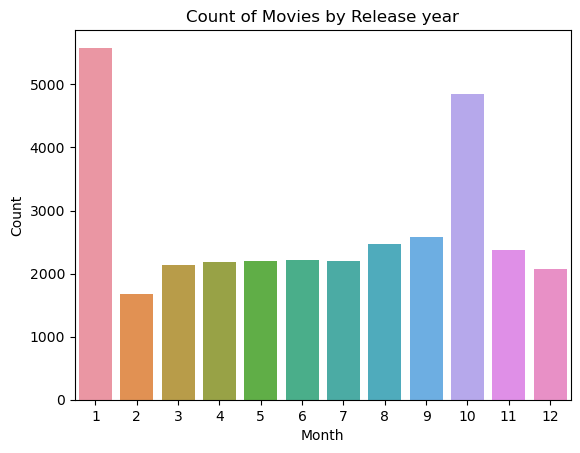

In [46]:
sns.countplot(data=df, x='month')
plt.title('Count of Movies by Release month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


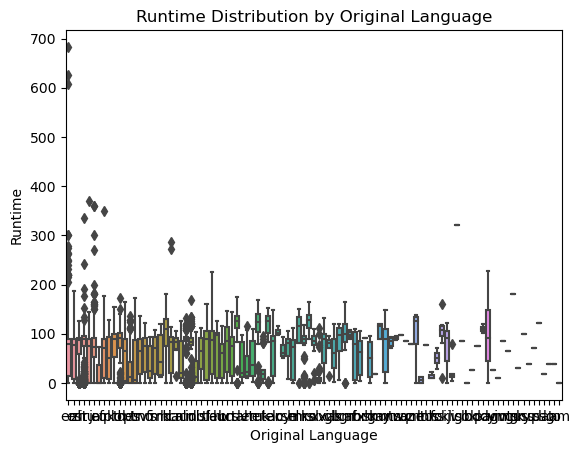

In [60]:
sns.boxplot(data=df, x='original_language', y='runtime')
plt.title('Runtime Distribution by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Runtime')
plt.show()

## dealing with missing values

In [ ]:
df.isna().sum()

In [ ]:
df['collection_name'].fillna('',inplace=True)

In [ ]:
df['overview'].fillna('Empty',inplace=True)

In [ ]:
df['tagline'].fillna('Empty',inplace = True)

In [ ]:
df['collection'].describe()

In [ ]:
df['collection'].fillna(df['collection'].median(),inplace=True)

In [ ]:
 df.to_csv('horror.csv')

In [ ]:
import streamlit as st

In [67]:
%%writefile horror_movies1.py
import streamlit as st
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(layout='wide',
                  page_title = 'dashboard')

tab1, tab2, tab3 = st.tabs(['descriptive statistics', 'numerical charts', 'categorical chart'])

df = pd.read_csv(r"D:\epsilon course\datasets\horror.csv")
box = st.sidebar.checkbox('show data', False ,key =1)
num = df.describe()
cat = df.describe(include="O")



if box:
    st.header('sample data')
    st.dataframe(df.head(10))

with tab1:
    col1,col2,col3 = st.columns(3)
    with col1:
        st.subheader('categorical descriptive statistics')
        st.dataframe(cat)
        
    with col3:
        st.subheader('numerical descriptive statistics')
        st.dataframe(num)
with tab2:
    month = st.sidebar.selectbox('select month',df['month'].unique())
    vote = st.sidebar.selectbox('select vote',df['vote_average'].unique())
    col1,col2,col3 = st.columns(3)
    with col1:
        new_df = df[df['month'] == month]
        fig =  px.bar(df, x='month',  title= f'Count of Movies by Release month'.title())
        st.plotly_chart(fig,use_container_width=True)
        fig = px.bar(new_df, x ='month', y = 'revenue', color = 'vote_average',title = f'revenue for {month} month'.title())
        st.plotly_chart(fig,use_container_width=True)
        new_df1 = df[df['vote_average'] == vote]
        fig = px.histogram(new_df1, x= 'vote_average',title = f'Distribution of vote average'.title())
        st.plotly_chart(fig,use_container_width=True)
        
with tab3:
    original_language = st.sidebar.selectbox('select movie name',df['original_language'].unique())
    genre_name = st.sidebar.selectbox('select genre name',df['genre_names'].unique())
    col1,col2,col3 = st.columns(3)
    with col1:
        df_new2 = df[df['original_language'] == original_language]
        fig = px.scatter(df_new2, x='popularity', y='vote_average', hover_data=['original_language'])
        st.plotly_chart(fig,use_container_width=True)
        df_new3 = df[df['genre_names'] == genre_name]
    with col3:
        fig = px.bar(df_new3, x='genre_names', y='popularity')
        st.plotly_chart(fig,use_container_width = True)


Overwriting horror_movies1.py


In [ ]:
! streamlit run horror_movies1.py

## Handle outliers

In [ ]:
from datasist.structdata import detect_outliers
index = detect_outliers(df,0,['popularity','vote_count','runtime','revenue','budget'])
len(index)

In [ ]:
df.shape

In [ ]:
df.drop(index,inplace=True)

## working on recommendation system 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
np.unique(df['original_language'])

## choose only some portion of data

In [ ]:
df_2 = df.loc[(df['original_language'] == 'en') & (df['year']>2000)]
len(df_2)

In [ ]:
df_3 = pd.DataFrame(df_2)
df_3.tail()

In [ ]:
final_data = df_3[['title','tagline']]
final_data = final_data.set_index('title')

In [ ]:
final_data.head(50)

## preprocess the data

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_sentences(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    my_sent = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    final_sent = ' '.join(my_sent)
    final_sent = final_sent.replace("n't", "not")
    final_sent = final_sent.replace("'m", "am")
    final_sent = final_sent.replace("'s", "is")
    final_sent = final_sent.replace("'re", "are")
    final_sent = final_sent.replace("'ll", "will")
    final_sent = final_sent.replace("'d", "would")
    final_sent = final_sent.replace("'ve", "have")
    return final_sent
final_data['new_tagline'] = final_data['tagline'].apply(preprocess_sentences)
final_data.head()


## using TF-IDF to vectorize preprocessed movie tagline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_movie_id = tfidf.fit_transform((final_data["new_tagline"]))

# finding cosine similarity between vectors
from sklearn.metrics.pairwise import cosine_similarity
similarty = cosine_similarity(tfidf_movie_id, tfidf_movie_id)

In [ ]:
indices = pd.Series(final_data.index)

def recommendation(title, cosine_sim = similarty):
    try:
        index = indices[indices == title].index[0]
        similarity_scores = pd.Series(cosine_sim[index]).sort_values(ascending = False)
        top_10_movies = list(similarity_scores.iloc[1:11].index)
        recommended_movies = [list(final_data.index)[i] for i in top_10_movies]
        return recommended_movies
    except:
        print("No movie name found")

In [ ]:
recommendation('The Revenge of Robert')